<table class="table table-bordered">
    <tr>
        <th style="width:250px;">
            <img src='./images/RISE_FFS_2_Light BG@4x.png' style="background-color:white; width: 100%; height: 100%; padding: 20px">
        </th>
        <th style="text-align:center;">
            <h1>Distributions</h1>
            <h3>IBF TFIP</h3>
        </th>
    </tr>
</table>

<a id=contentpage></a>
### Objectives
After completing this practical exercise, you should be able to:
- [1: Understand Discrete Distributions](#a)
    - [1.1 Binomial distribution](#a1)
    - [1.2 Poisson Distribution](#a2)
- [2:Understand Continuous Distribution](#b)
    - [2.1 Normal distribution](#b1)
- [3: Other Continuous Distributions](#c)
    - [3.1 Students' t-distribution](#c1)
    - [3.2 Exponential distribution](#c2)


<a id="a"></a>
##  1 Discrete Distributions:

Discrete probability mass function (PMF)

In [1]:
# Create some discrete variables
import numpy as np
dvar = np.arange(20)

<a id="a1"></a>
#### 1.1 Binomial distribution

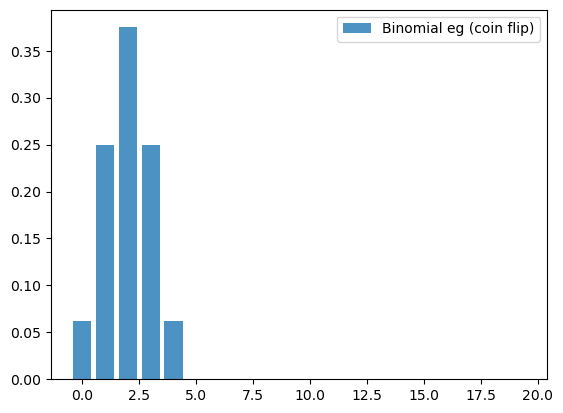

[0.0625 0.25   0.375  0.25   0.0625 0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]


In [2]:
# Binomial Distribution
import scipy.stats as st
import matplotlib.pyplot as plt
pmf_binom = st.binom.pmf(dvar, 4, 0.5) # (discrete values, no of trials, probability)
plt.bar(dvar, pmf_binom, label="Binomial eg (coin flip)", alpha=0.8)

plt.legend()
plt.show()
print(pmf_binom)

#### Qn1a: What is the probability that there no heads when you flip the coin 4 times?
#### Qn 1b: What is the probability that there is at least 1 head when you flip the coin 4 times?

In [3]:
# Q1a Answer:
p_0 = st.binom.pmf(0, 4, 0.5)
print(f"P(X = 0) = {p_0}")

P(X = 0) = 0.0625


In [4]:
# Q1b Answer: 
print(f"P(X > 0) = {1-p_0}")

P(X > 0) = 0.9375


<a id="a2"></a>
#### 1.2 Poisson distribution

In [5]:
import numpy as np
dvar2 = np.arange(20)

####  Suppose that a shop observes that on average, it receives 5 visitors each hour. Assume that this follows poisson distribution, construct the distribution.

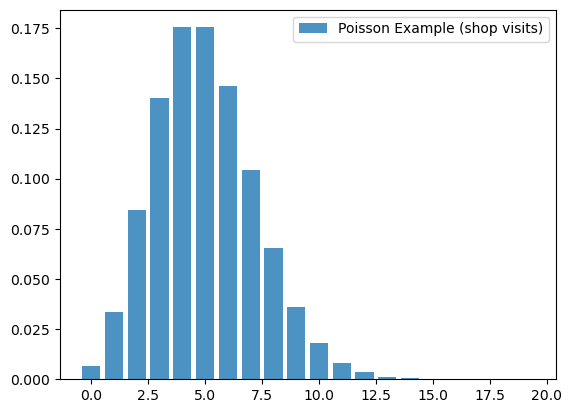

In [6]:
# Poisson Distribution
pmf_poisson = st.poisson.pmf(dvar2, 5) # (discrete values, mean)
plt.bar(dvar2, pmf_poisson, label="Poisson Example (shop visits)", alpha=0.8)
plt.legend()
plt.show()

#### Q2a: What is the probability that between 6 to 10 people visits the shop in a one hour period?

In [7]:
# Q2a Ans:
pmf_poisson = st.poisson.pmf([7,8,9], 5) # (discrete values, mean)
pmf_poisson

array([0.10444486, 0.06527804, 0.03626558])

In [8]:
sum(pmf_poisson)

0.2059884797208563

#### Q2b: Show the probability distribution for the number of people visiting the shop in a 2 hour period.

In [9]:
# Q2b Ans: since the period is doubled, the lambda value used is also doubled
pmf_poisson = st.poisson.pmf(dvar2, 10) # (x-values, mean)

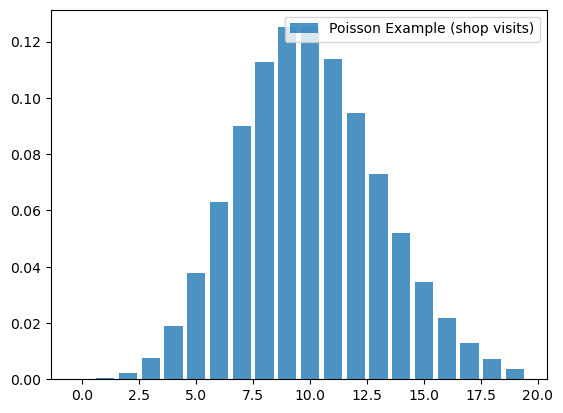

In [10]:
import matplotlib.pyplot as plt
plt.bar(dvar2, pmf_poisson, label="Poisson Example (shop visits)", alpha=0.8)
plt.legend()
plt.show()

#### Q2c: What is the probability that 20 people will visit the shop in a 2 hour period?

In [11]:
# Q2c Ans:
pmf_poisson = st.poisson.pmf(20, 10) # (discrete values, mean)
pmf_poisson

0.0018660813139987742

[Back to top](#contentpage)

<a id="b"></a>
##  2 Continuous Distribution

#### The time taken by a students to finish a 2.4km run has a mean timing of 15 mins and a standard deviation of 2 mins. Construct the normal distribution below.

In [12]:
# Create some continuous variables
cvar = np.linspace(10, 20, 2000)

<a id="b1"></a>
####  2.1 Normal Distribution

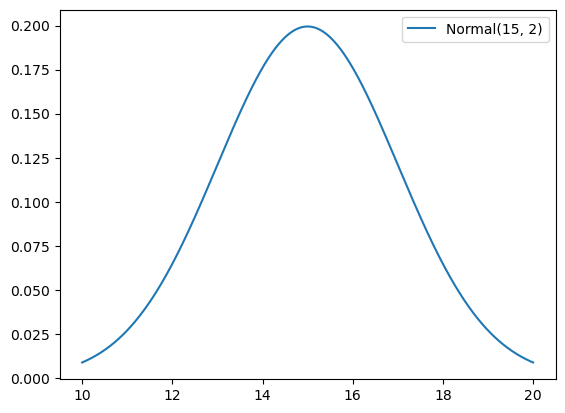

In [13]:
# Normal Distribution
pdf_normal = st.norm.pdf(cvar, loc=15, scale=2) # (continuous values, mean, std dev)
plt.plot(cvar, pdf_normal, label="Normal(15, 2)")
plt.legend()
plt.show()

#### Q3a: What is the probability that a student complete 2.4km under 12mins?
#### Q3b: What is the probability that a student will complete 2.4km beyond 13mins?
#### Q3c: What is the timing taken for the slowest 2% of the students?
#### Q3d: What is the time taken by the middle 20% of the students?


In [14]:
# Q3a Ans:
# To find the probability hat the student run faster than 12 mins, use the cumulative density function
# P(X < a) use st.norm.cdf(a, mean, sd)
p_12 = st.norm.cdf(12, loc=15, scale=2)
print(f"P(X < 12) = {p_12}")

P(X < 12) = 0.06680720126885807


In [15]:
# Q3b Ans: To find the probability hat the student run faster than 12 mins, use the survival function
# To find the P(X > a) use st.norm.sf(a, mean, sd)
# alternatively use 1 - st.norm.cdf(a, mean, sd)
p_13 = st.norm.sf(13, loc=15, scale=2)
print(f"P(X > 13) = {p_13}")

P(X > 13) = 0.8413447460685429


In [16]:
# Q3c Ans: To find the time given the probability, use the percentage point function
# st.norm.ppf(%, mean, sd)
time = st.norm.ppf(0.98, loc=15, scale=2)
print(f"Time taken by slowest 2% of students is more than {time:.3f} mins")

Time taken by slowest 2% of students is more than 19.107 mins


In [17]:
# Q3d Ans: Middle 20% means there is 40% on both tails.
time_low =  st.norm.ppf(0.4, 15, 2)
time_up = st.norm.ppf(0.8, 15, 2)
print(f"Time taken by middle 20% of students is between {time_low:.3f} mins and {time_up:.3f} mins")

Time taken by middle 20% of students is between 14.493 mins and 16.683 mins


#### Convert the X variable to standard normal distribution.
#### Show that probability X < 12 mins on the normal distribution is the same as Z < - 1.5 on the standard normal distribution
#### ie: P(X < 12mins) = P( Z < -1.5)


In [18]:
# convert the time, X = 12 into Z value in the standard normal distribution
# Formula: Z = (X - mean)/ sd
z = (12 - 15)/ 2
print(f"when X = 12, the equivalent Z value is {z}")

when X = 12, the equivalent Z value is -1.5


In [19]:
prob = st.norm.cdf(z) # default mean = 0, sd = 1 when no parameters provided
print(f"P(Z < -1.5) = {prob}")
print(f"P(X < 12) = {p_12}")

P(Z < -1.5) = 0.06680720126885807
P(X < 12) = 0.06680720126885807


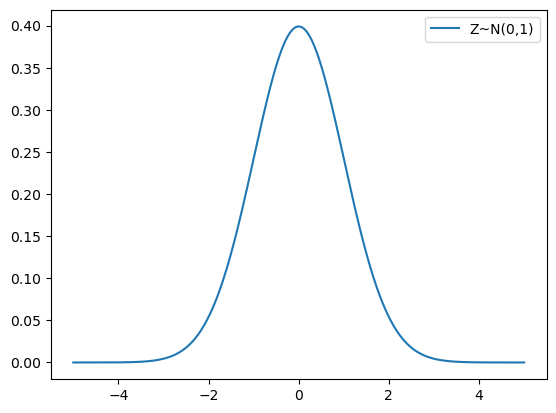

In [20]:
# Normal Distribution
cvar = np.linspace(-5, 5, 2000) # creating "countinuous" variables between -5 and 5
pdf_normal = st.norm.pdf(cvar, loc=0, scale=1) # (cont, mean, std dev)
plt.plot(cvar, pdf_normal, label="Z~N(0,1)")
plt.legend()
plt.show()

[Back to top](#contentpage)

<a id="c"></a>
##  3 Other continuous distributions

<a id="c1"></a>
#### 3.1 Students' T Distribution
##### Plot a distribution with degree of freedom of 1: X ~ t(1)

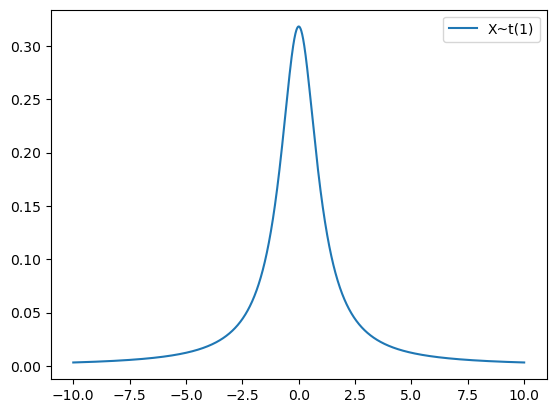

In [21]:
cvar = np.linspace(-10, 10, 2000) # creating some "countinuous" variables
# Student T Distribution
pdf_studentt = st.t.pdf(cvar, 1) # (x-values, dof)
plt.plot(cvar, pdf_studentt, label="X~t(1)")
plt.legend()
plt.show()

#### Plot the graph with X~t(10). Is this graph taller and narrower?

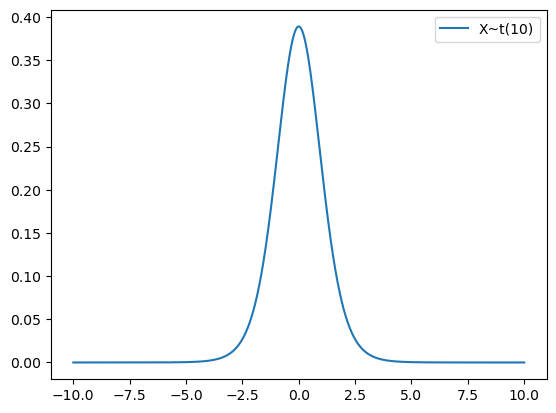

In [22]:
pdf_studentt = st.t.pdf(cvar, 10) # (x-values, dof)
plt.plot(cvar, pdf_studentt, label="X~t(10)")
plt.legend()
plt.show()

As n gets larger, and degree of freedom increases, the t-distribution will approach the Standard Normal Distribution. It will get taller and the tails will be thinner.

#### Q4: A sample of 11 batteries have their lifespan is collected. The sample mean is calculated to be 560 hours, with sample standard deviation of 15hours. Suppose the battery lifespans follow a t-distribution, calculate the probability that the battery will last more than 570 hours.

Ans:
Let X be the lifespan of a battery, find P(X > 570). Convert to t value using $t =  \frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}$

In [23]:
import math
t = (570 - 560)/ (15/math.sqrt(11))
print(t)

2.2110831935702664


In [24]:
prob = st.t.sf(t,10)
print(prob)

0.025733086505438582


<a id="c2"></a>
#### 3.2 Exponential Distribution

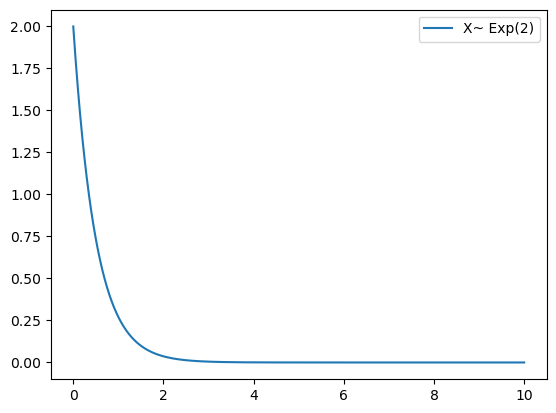

In [25]:
cvar = np.linspace(0, 10, 2000) # creating "countinuous" variables to use for the distribution
# Exponential Distribution
pdf_exponential = st.expon.pdf(cvar,  scale=0.5) #(continuous values, scale = 1/lambda)
plt.plot(cvar, pdf_exponential, label="X~ Exp(2)")
plt.legend()
plt.show()

#### Suppose there is an electronic device that last on average 5 years. The lifespan follows an exponential distribution. The 


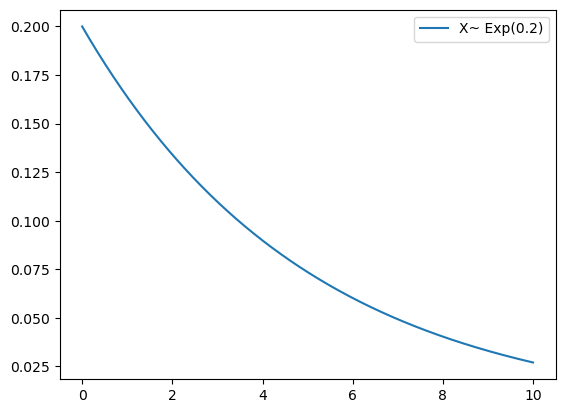

In [26]:
pdf_exponential = st.expon.pdf(cvar,  scale=5) #(continuous values, scale = 1/lambda)
plt.plot(cvar, pdf_exponential, label="X~ Exp(0.2)")
plt.legend()
plt.show()

#### 5(a) What is the probability that the electronic device will last less than 3 years?
Hint, use: $ P(X<x)= 1- e^{-\lambda x}$
#### 5(b) What is the probability that the electronic device will last more than 10 years?
Hint, use: $P(X>x) = e^{-\lambda x}$
#### 5(c) What is the probability that it will last between 3 to 7 years?

In [27]:
# Ans 5(a):
prb = st.expon.cdf(3,scale= 5)
print(f"P(X < 3) = {prb}")

P(X < 3) = 0.4511883639059735


In [28]:
# 5(a) alternative solution
rate_parameter = 1/5 # where lambda = 5
1-math.exp(-rate_parameter*3)

0.4511883639059736

In [29]:
# Ans 5(b):
prb2 = st.expon.sf(10,scale=5)
print(f"P(X>10) = {prb2}")

P(X>10) = 0.1353352832366127


In [30]:
# 5(b) alternative solution
math.exp(-rate_parameter*10)

0.1353352832366127

In [31]:
# Ans 5(c)
# P(3< X < 7) = P(X< 7) - P(X<3)
prb3 = st.expon.cdf(7,scale = 5)-st.expon.cdf(3,scale = 5)
print(f"P(3 < X < 7) = {prb3}")

P(3 < X < 7) = 0.30221467215242004


[Back to top](#contentpage)